In [1]:
import numpy as np
from sklearn import datasets
iris_X, iris_y = datasets.load_iris(return_X_y=True)
np.unique(iris_y)

array([0, 1, 2])

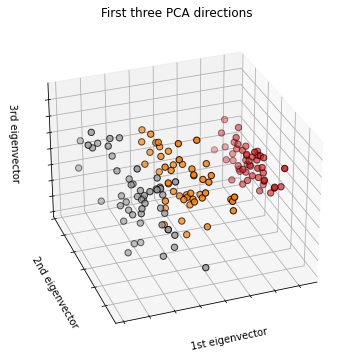

In [7]:
import matplotlib.pyplot as plt
import mpl_toolkits.mplot3d
from sklearn.decomposition import PCA

iris = datasets.load_iris()
X = iris.data[:, :2] 
y = iris.target

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
y_min, y_max = X[:, 1].min() - 0.5, X[:, 1].max() + 0.5

fig = plt.figure(1, figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d", elev=-150, azim=110)

X_reduced = PCA(n_components=3).fit_transform(iris.data)
ax.scatter(
    X_reduced[:, 0],
    X_reduced[:, 1],
    X_reduced[:, 2],
    c=y,
    cmap=plt.cm.Set1,
    edgecolor="k",
    s=40,
)

ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

In [8]:
# Split iris data in train and test data
# A random permutation, to split the data randomly
np.random.seed(0)
indices = np.random.permutation(len(iris_X))
iris_X_train = iris_X[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_X_test = iris_X[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]
# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_X_train, iris_y_train)

KNeighborsClassifier()

In [9]:
knn.predict(iris_X_test)

array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0])

In [10]:
iris_y_test

array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0])

In [11]:
diabetes_X, diabetes_y = datasets.load_diabetes(return_X_y=True)
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test  = diabetes_X[-20:]
diabetes_y_train = diabetes_y[:-20]
diabetes_y_test  = diabetes_y[-20:]

In [12]:
from sklearn import linear_model
regr = linear_model.LinearRegression()
regr.fit(diabetes_X_train, diabetes_y_train)

LinearRegression()

In [13]:
print(regr.coef_) 

[ 3.06094248e-01 -2.37635570e+02  5.10538048e+02  3.27729878e+02
 -8.14111926e+02  4.92799595e+02  1.02841240e+02  1.84603496e+02
  7.43509388e+02  7.60966464e+01]


In [14]:
np.mean((regr.predict(diabetes_X_test) - diabetes_y_test)**2)

2004.5186863342092

In [15]:
regr.score(diabetes_X_test, diabetes_y_test)

0.585085427447195

In [16]:
X = np.c_[ .5, 1].T
y = [.5, 1]
test = np.c_[ 0, 2].T
regr = linear_model.LinearRegression()

In [17]:
import matplotlib.pyplot as plt
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

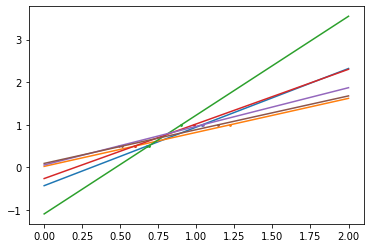

In [18]:
np.random.seed(0)
for _ in range(6):
    this_X = .1 * np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test))
    plt.scatter(this_X, y, s=3)

In [19]:
regr = linear_model.Ridge(alpha=.1)

In [20]:
plt.figure()

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

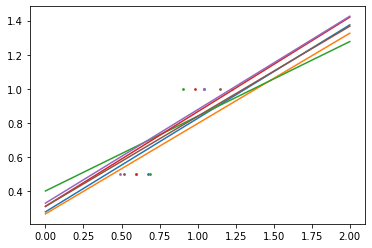

In [21]:
np.random.seed(0)
for _ in range(6):
    this_X = .1 * np.random.normal(size=(2, 1)) + X
    regr.fit(this_X, y)
    plt.plot(test, regr.predict(test))
    plt.scatter(this_X, y, s=3)

In [22]:
alphas = np.logspace(-4, -1, 6)

In [23]:
print([regr.set_params(alpha=alpha)
           .fit(diabetes_X_train, diabetes_y_train)
           .score(diabetes_X_test, diabetes_y_test)
       for alpha in alphas])

[0.5851211547549655, 0.5852172781570939, 0.5854773661274456, 0.585559985499863, 0.5830795208723956, 0.5705970628037379]


In [24]:
regr = linear_model.Lasso()
scores = [regr.set_params(alpha=alpha)
              .fit(diabetes_X_train, diabetes_y_train)
              .score(diabetes_X_test, diabetes_y_test)
          for alpha in alphas]
best_alpha = alphas[scores.index(max(scores))]
regr.alpha = best_alpha
regr.fit(diabetes_X_train, diabetes_y_train)

Lasso(alpha=0.025118864315095794)

In [25]:
print(regr.coef_)

[   0.         -212.4341158   517.20105983  313.77231942 -160.82780155
   -0.         -187.19532359   69.38062294  508.65764425   71.8438046 ]


In [26]:
log = linear_model.LogisticRegression(C=1e5)
log.fit(iris_X_train, iris_y_train)

LogisticRegression(C=100000.0)

In [27]:
from sklearn import datasets, neighbors, linear_model

In [28]:
X_digits, y_digits = datasets.load_digits(return_X_y=True)
X_digits = X_digits / X_digits.max()

In [29]:
from sklearn import svm
svc = svm.SVC(kernel='linear')
svc.fit(iris_X_train, iris_y_train)

SVC(kernel='linear')

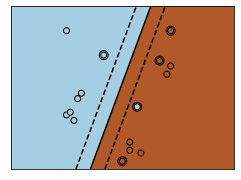

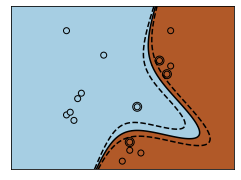

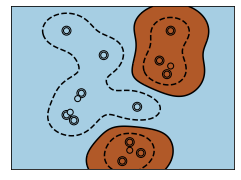

In [32]:
from sklearn import svm


# Our dataset and targets
X = np.c_[
    (0.4, -0.7),
    (-1.5, -1),
    (-1.4, -0.9),
    (-1.3, -1.2),
    (-1.1, -0.2),
    (-1.2, -0.4),
    (-0.5, 1.2),
    (-1.5, 2.1),
    (1, 1),
    # --
    (1.3, 0.8),
    (1.2, 0.5),
    (0.2, -2),
    (0.5, -2.4),
    (0.2, -2.3),
    (0, -2.7),
    (1.3, 2.1),
].T
Y = [0] * 8 + [1] * 8

# figure number
fignum = 1

# fit the model
for kernel in ("linear", "poly", "rbf"):
    clf = svm.SVC(kernel=kernel, gamma=2)
    clf.fit(X, Y)

    # plot the line, the points, and the nearest vectors to the plane
    plt.figure(fignum, figsize=(4, 3))
    plt.clf()

    plt.scatter(
        clf.support_vectors_[:, 0],
        clf.support_vectors_[:, 1],
        s=80,
        facecolors="none",
        zorder=10,
        edgecolors="k",
    )
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired, edgecolors="k")

    plt.axis("tight")
    x_min = -3
    x_max = 3
    y_min = -3
    y_max = 3

    XX, YY = np.mgrid[x_min:x_max:200j, y_min:y_max:200j]
    Z = clf.decision_function(np.c_[XX.ravel(), YY.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(XX.shape)
    plt.figure(fignum, figsize=(4, 3))
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(
        XX,
        YY,
        Z,
        colors=["k", "k", "k"],
        linestyles=["--", "-", "--"],
        levels=[-0.5, 0, 0.5],
    )

    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)

    plt.xticks(())
    plt.yticks(())
    fignum = fignum + 1
plt.show()